<a href="https://colab.research.google.com/github/Aymanabdulkader/Bank-Attrition-Analyis/blob/main/Bank_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Load the dataset, skipping the metadata row
df = pd.read_csv('https://gitlab.crio.do/me_notebook/me_jupyter_bankattritionanalysis/-/raw/master/bank_attrition_dataset.csv',header = 0, skiprows=[1])

# Display the first few rows
df.head()

,RowNumber,CustomerId,first_name,state,Gender,Age,Tenure,CreditScore,Balance,HasCrCard,...,HasFD,NumOfProducts,IsActiveMember,Salary,Exited,Complain,NumComplain,Satisfaction Score,Point Earned,PreferredChannel
0,1,TN00001,Sunita,Tamil Nadu,Female,26,1,673,117822.37,1,...,1,2,1,62000.0,0,0,0,5.0,100,Mobile
1,2,MH00002,Rohan,Maharashtra,Male,54,4,600,163508.11,1,...,1,3,1,62000.0,0,0,0,10.0,150,Mobile
2,3,KA00003,Ananya,Karnataka,Female,58,1,724,138773.12,1,...,1,3,1,97000.0,0,0,0,5.0,100,Mobile
3,4,MH00004,Nandini,Maharashtra,Female,39,2,695,136048.53,1,...,0,1,1,157000.0,0,0,0,10.0,150,Email
4,5,WB00005,Charvi,West Bengal,Female,25,3,675,27798.19,0,...,0,0,1,146000.0,0,0,0,6.0,110,Mobile


In [ ]:
# Print the column names
# print(df.columns)

# Standardize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Print the standardized column names to verify
df.columns

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel'],
      dtype='object')

In [ ]:
# Check missing values
# print(df.isnull().sum())

# Salary → replace with median
df['salary'] = df['salary'].fillna(df['salary'].median())

# Balance → replace with 0
df['balance'] = df['balance'].fillna(0)

# Satisfaction Score → median
df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].median())

# Gender → drop rows with missing gender
df = df.dropna(subset=['gender'])

# Card Type → fill with most frequent value
df['card_type'] = df['card_type'].fillna(df['card_type'].mode()[0])

# Check again
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 rownumber             0
customerid            0
first_name            0
state                 0
gender                0
age                   0
tenure                0
creditscore           0
balance               0
hascrcard             0
card_type             0
hasloan               0
hasfd                 0
numofproducts         0
isactivemember        0
salary                0
exited                0
complain              0
numcomplain           0
satisfaction_score    0
point_earned          0
preferredchannel      0
dtype: int64


In [ ]:
# Standardize card_type: uppercase & remove spaces
df['card_type'] = df['card_type'].str.lower().str.replace(' ', '_')


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric Columns:", numeric_cols)

# Count unique values for each numeric column
unique_counts = df[numeric_cols].nunique()
print("\nUnique Counts:\n", unique_counts)


Numeric Columns: ['rownumber', 'age', 'tenure', 'creditscore', 'balance', 'hascrcard', 'hasloan', 'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited', 'complain', 'numcomplain', 'satisfaction_score', 'point_earned']

Unique Counts:
 rownumber             14984
age                      73
tenure                   34
creditscore             484
balance               12666
hascrcard                 2
hasloan                   2
hasfd                     2
numofproducts             4
isactivemember            2
salary                  230
exited                    2
complain                  2
numcomplain              50
satisfaction_score       12
point_earned            110
dtype: int64


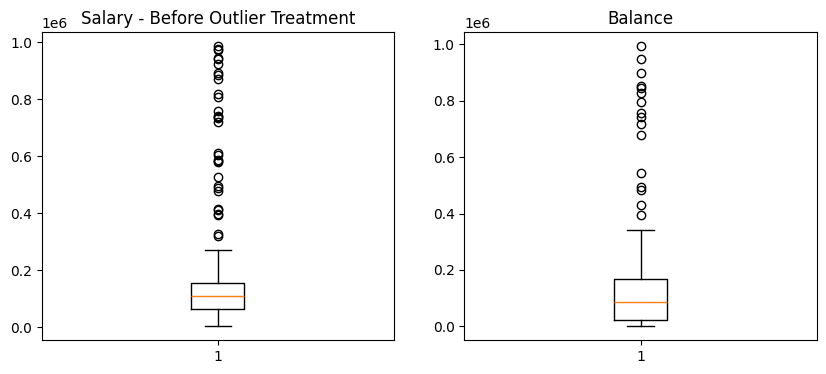

Number of Salary Outliers: 31


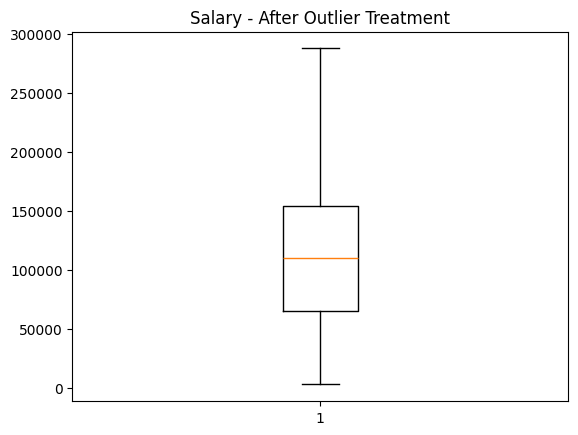

In [ ]:
# Boxplots for Salary and Balance
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.boxplot(df['salary'])
plt.title("Salary - Before Outlier Treatment")

plt.subplot(1, 2, 2)
plt.boxplot(df['balance'])
plt.title("Balance")
plt.show()

# IQR method for Salary
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print("Number of Salary Outliers:", len(outliers))

# Cap outliers to upper bound
df['salary'] = np.where(df['salary'] > upper_bound, upper_bound, df['salary'])

# Plot after handling
plt.boxplot(df['salary'])
plt.title("Salary - After Outlier Treatment")
plt.show()


In [ ]:
# Step 1: Basic Summary Statistics
salary_mean = df['salary'].mean()
salary_median = df['salary'].median()

balance_mean = df['balance'].mean()
balance_median = df['balance'].median()

credit_mean = df['creditscore'].mean()
credit_median = df['creditscore'].median()

print(f"salary - Mean: {salary_mean:.2f}, Median: {salary_median}")
print(f"balance - Mean: {balance_mean:.2f}, Median: {balance_median}")
print(f"creditscore - Mean: {credit_mean:.2f}, Median: {credit_median}")


salary - Mean: 109801.55, Median: 110000.0
balance - Mean: 97694.64, Median: 84369.805
creditscore - Mean: 669.29, Median: 684.0



Value Counts for gender:
 gender
Male      8989
Female    5995
Name: count, dtype: int64

Value Counts for card_type:
 card_type
silver            4306
gold              4093
platinum          3353
not_applicable    3230
gold_                1
silver_              1
Name: count, dtype: int64

Value Counts for hasloan:
 hasloan
0    11542
1     3442
Name: count, dtype: int64

Value Counts for hasfd:
 hasfd
0    8312
1    6672
Name: count, dtype: int64


/tmp/ipython-input-1553646788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipython-input-1553646788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipython-input-1553646788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipython-input-1553646788.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

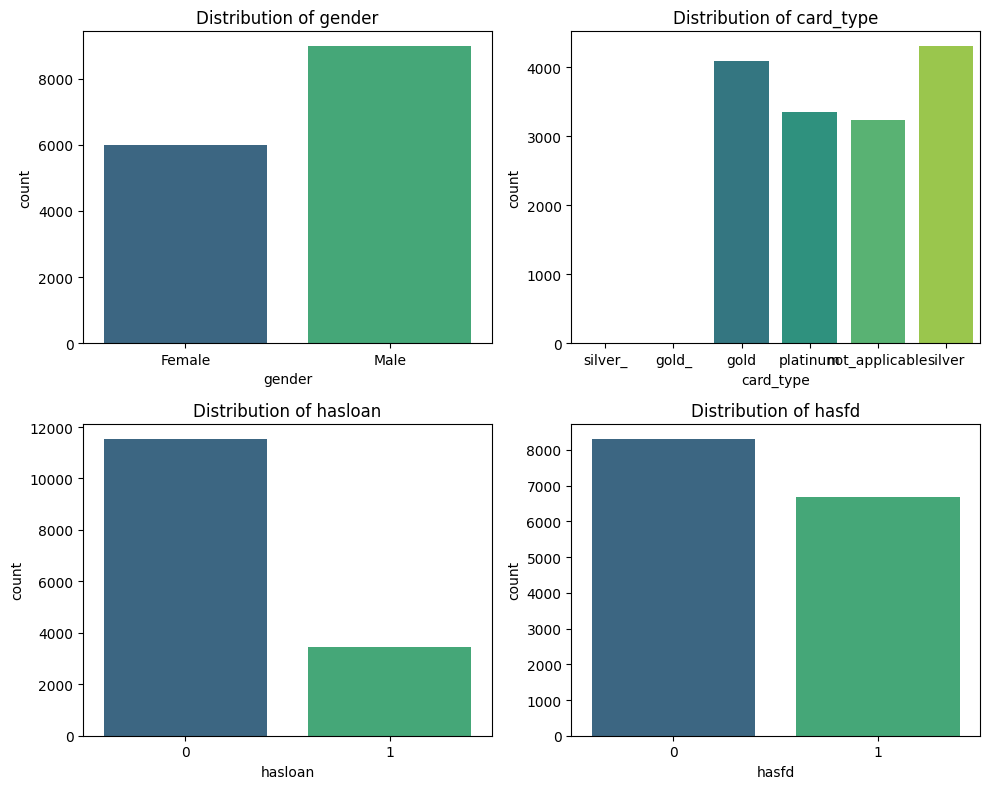

In [ ]:
# Step 2: Count categories
categorical_vars = ['gender', 'card_type', 'hasloan', 'hasfd']

for col in categorical_vars:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())

# Optional: Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(x=df[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


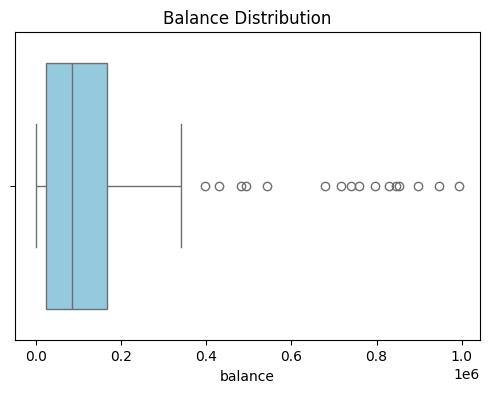

In [ ]:
# Step 3: Boxplot for Balance
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['balance'], color='skyblue')
plt.title("Balance Distribution")
plt.show()


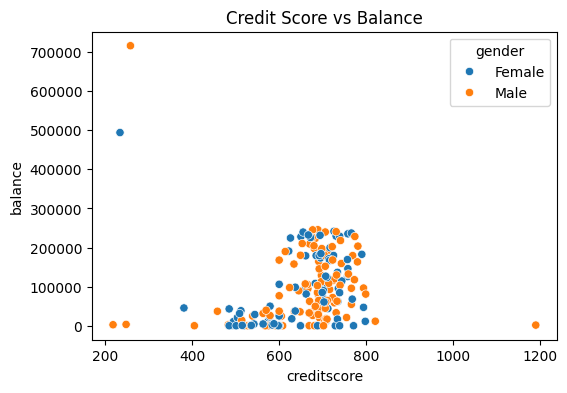

In [ ]:
# Step 4: Scatter plot - sample of 200
sample_df = df.sample(n=200, random_state=42)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='creditscore', y='balance', data=sample_df, hue='gender')
plt.title("Credit Score vs Balance")
plt.show()


In [ ]:
# Step 5: New features

# Debt-to-Income Ratio
df['debt_to_income_ratio'] = (df['balance'] + (df['hasloan'] * df['salary'] * 0.3)) / df['salary']

# Loyalty Score
df['loyalty_score'] = (df['tenure'] * df['satisfaction_score']) / (1 + df['numcomplain'])

df.head()


,rownumber,customerid,first_name,state,gender,age,tenure,creditscore,balance,hascrcard,...,isactivemember,salary,exited,complain,numcomplain,satisfaction_score,point_earned,preferredchannel,debt_to_income_ratio,loyalty_score
0,1,TN00001,Sunita,Tamil Nadu,Female,26,1,673,117822.37,1,...,1,62000.0,0,0,0,5.0,100,Mobile,1.900361,5.0
1,2,MH00002,Rohan,Maharashtra,Male,54,4,600,163508.11,1,...,1,62000.0,0,0,0,10.0,150,Mobile,2.937228,40.0
2,3,KA00003,Ananya,Karnataka,Female,58,1,724,138773.12,1,...,1,97000.0,0,0,0,5.0,100,Mobile,1.730651,5.0
3,4,MH00004,Nandini,Maharashtra,Female,39,2,695,136048.53,1,...,1,157000.0,0,0,0,10.0,150,Email,0.866551,20.0
4,5,WB00005,Charvi,West Bengal,Female,25,3,675,27798.19,0,...,1,146000.0,0,0,0,6.0,110,Mobile,0.190399,18.0


In [ ]:
# Step 6: Complaints vs State Average
state_avg_complaints = df.groupby('state')['numcomplain'].transform('mean')
df['high_complainer'] = (df['numcomplain'] > state_avg_complaints).astype(int)

df[['state', 'numcomplain', 'high_complainer']].head()
df.isnull().sum()

,0
rownumber,0
customerid,0
first_name,0
state,0
gender,0
age,0
tenure,0
creditscore,0
balance,0
hascrcard,0


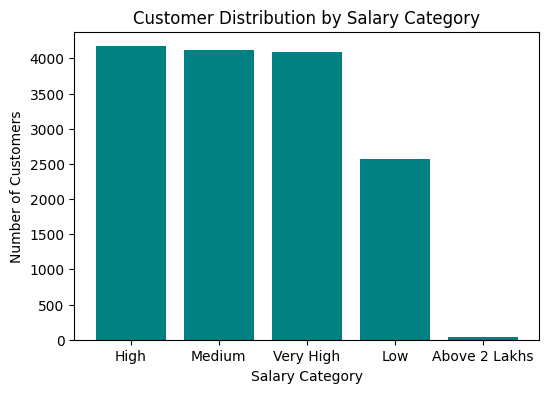

In [ ]:
# Step 7: Salary Category
conditions = [
    (df['salary'] <= 50000),
    (df['salary'] > 50000) & (df['salary'] <= 100000),
    (df['salary'] > 100000) & (df['salary'] <= 150000),
    (df['salary'] > 150000) & (df['salary'] <= 200000),
    (df['salary'] > 200000)
]

bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Above 2 Lakhs']

df['salary_category'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Count and plot
salary_cat_counts = df['salary_category'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(salary_cat_counts.index, salary_cat_counts.values, color='teal')
plt.title("Customer Distribution by Salary Category")
plt.xlabel("Salary Category")
plt.ylabel("Number of Customers")
plt.show()


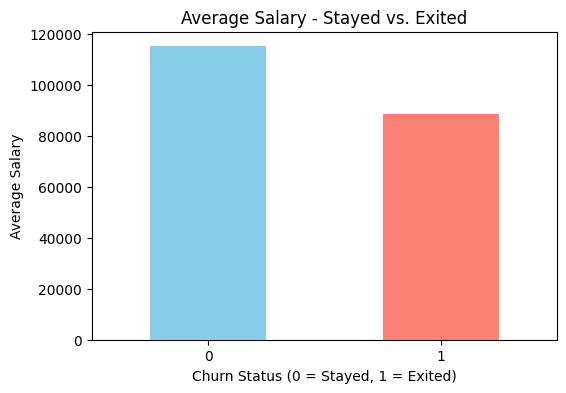

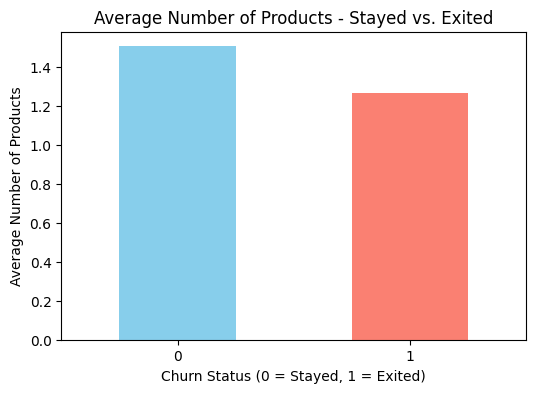

In [ ]:
import matplotlib.pyplot as plt

# ✅ Average Number of Products Based on Customer Tenure
avg_products_by_tenure = df.groupby('tenure')['numofproducts'].mean()

# ✅ Group data by churn status to analyze salary and product usage
avg_stats_by_churn = df.groupby('exited').agg({
    'salary': 'mean',
    'numofproducts': 'mean'
})

# --- Plot: Average Salary - Stayed vs. Exited ---
plt.figure(figsize=(6,4))
avg_stats_by_churn['salary'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Salary - Stayed vs. Exited')
plt.xlabel('Churn Status (0 = Stayed, 1 = Exited)')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

# --- Plot: Average Number of Products - Stayed vs. Exited ---
plt.figure(figsize=(6,4))
avg_stats_by_churn['numofproducts'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Number of Products - Stayed vs. Exited')
plt.xlabel('Churn Status (0 = Stayed, 1 = Exited)')
plt.ylabel('Average Number of Products')
plt.xticks(rotation=0)
plt.show()


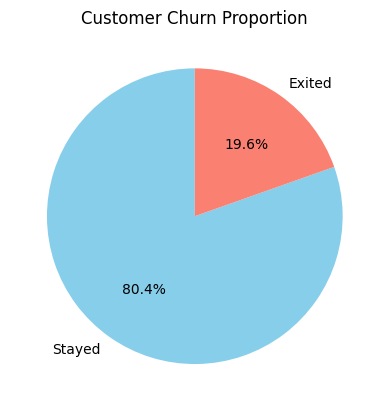

In [ ]:
# Step 7 churn_counts
churn_counts = df['exited'].value_counts()
plt.pie(
    churn_counts,
    labels=['Stayed', 'Exited'],
    autopct="%.1f%%",
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title("Customer Churn Proportion")
plt.show()

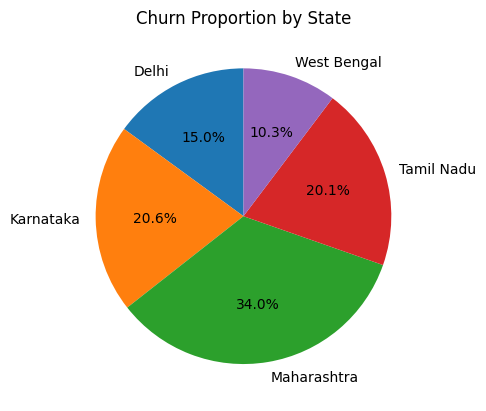

In [ ]:
# Step 8 state_churn
state_churn = df.groupby('state')['exited'].sum()
plt.pie(
    state_churn,
    labels=state_churn.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Churn Proportion by State")
plt.show()


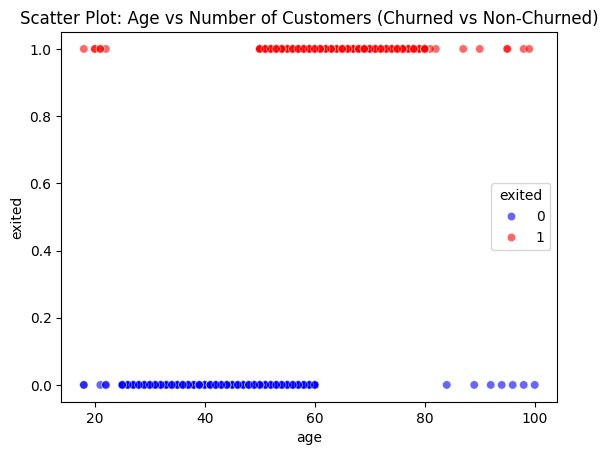

In [ ]:
sns.scatterplot(
    data=df,
    x="age",
    y="exited",
    hue="exited",
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title("Scatter Plot: Age vs Number of Customers (Churned vs Non-Churned)")
plt.show()


/tmp/ipython-input-1549672584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exited', y='age', data=df, palette=['blue', 'red'])


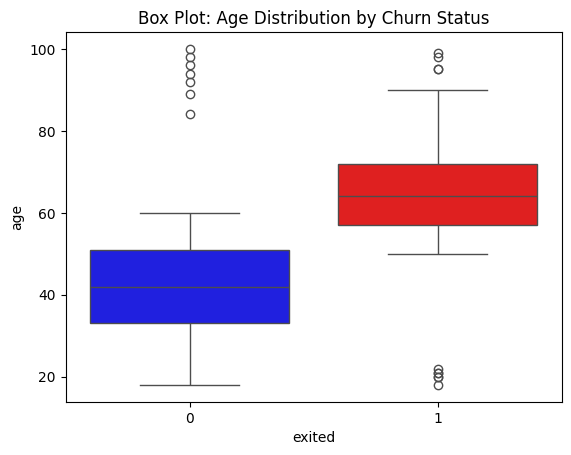

In [ ]:
sns.boxplot(x='exited', y='age', data=df, palette=['blue', 'red'])
plt.title("Box Plot: Age Distribution by Churn Status")
plt.show()


/tmp/ipython-input-1196079786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='exited', data=gender_churn, palette='viridis')


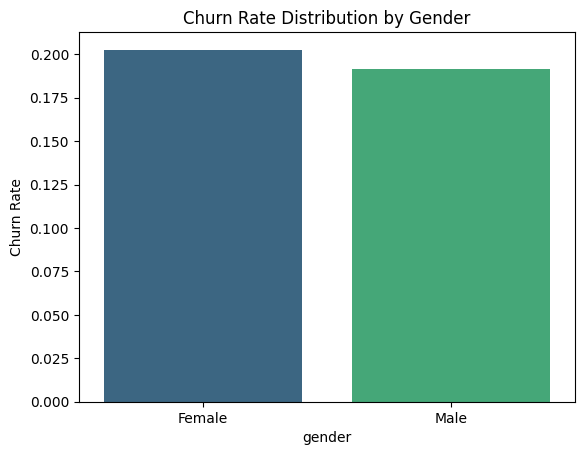

In [ ]:
gender_churn = df.groupby('gender')['exited'].mean().reset_index()
sns.barplot(x='gender', y='exited', data=gender_churn, palette='viridis')
plt.ylabel("Churn Rate")
plt.title("Churn Rate Distribution by Gender")
plt.show()


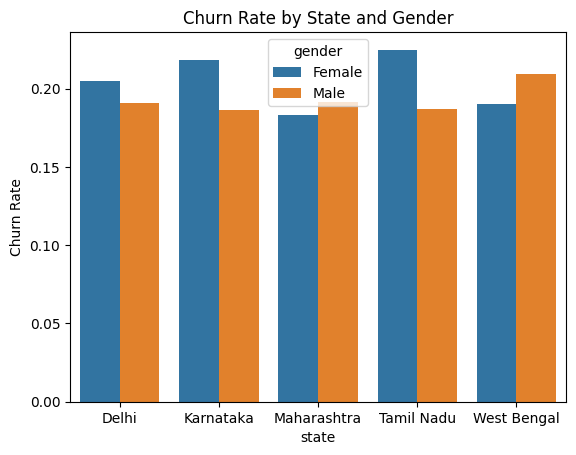

In [ ]:
state_gender_churn = df.groupby(['state', 'gender'])['exited'].mean().reset_index()
sns.barplot(x='state', y='exited', hue='gender', data=state_gender_churn)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by State and Gender")
plt.show()


/tmp/ipython-input-2241439433.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_churn = df.groupby('income_group')['exited'].mean().reset_index()
/tmp/ipython-input-2241439433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_group', y='exited', data=income_churn, palette='coolwarm')


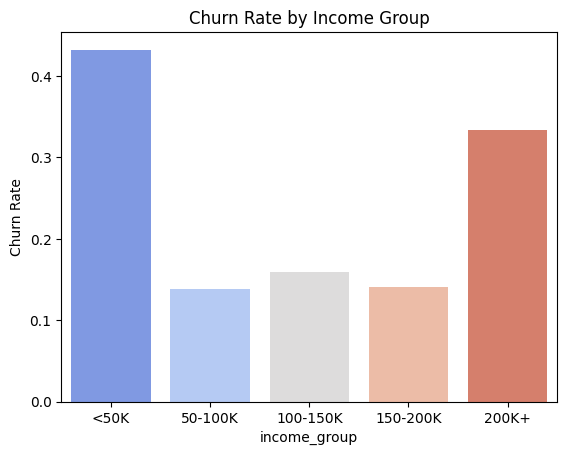

In [ ]:
bins = [0, 50000, 100000, 150000, 200000, df['salary'].max()]
labels = ['<50K', '50-100K', '100-150K', '150-200K', '200K+']
df['income_group'] = pd.cut(df['salary'], bins=bins, labels=labels)

income_churn = df.groupby('income_group')['exited'].mean().reset_index()
sns.barplot(x='income_group', y='exited', data=income_churn, palette='coolwarm')
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Income Group")
plt.show()


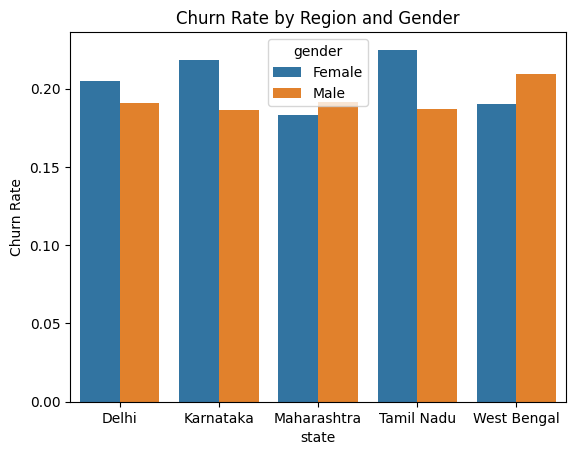

In [ ]:
region_gender_churn = df.groupby(['state', 'gender'])['exited'].mean().reset_index()

sns.barplot(x='state', y='exited', hue='gender', data=region_gender_churn)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Region and Gender")
plt.show()


/tmp/ipython-input-3723154895.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_satisfaction = df[df['exited'] == 1].groupby('age_group')['satisfaction_score'].mean().reset_index()
/tmp/ipython-input-3723154895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='satisfaction_score', data=age_satisfaction, palette='mako')


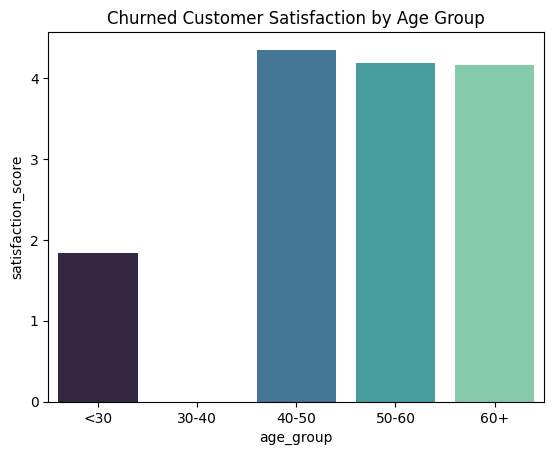

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel', 'debt_to_income_ratio', 'loyalty_score',
       'high_complainer', 'salary_category', 'income_group', 'age_group'],
      dtype='object')


In [ ]:
bins = [0, 30, 40, 50, 60, df['age'].max()]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_satisfaction = df[df['exited'] == 1].groupby('age_group')['satisfaction_score'].mean().reset_index()
sns.barplot(x='age_group', y='satisfaction_score', data=age_satisfaction, palette='mako')
plt.title("Churned Customer Satisfaction by Age Group")
plt.show()
print(df.columns)

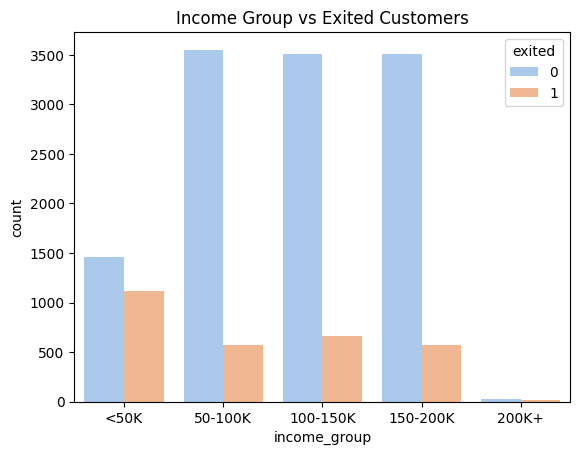

In [ ]:
sns.countplot(x="income_group", hue="exited", data=df, palette="pastel")
plt.title("Income Group vs Exited Customers")
plt.show()


In [ ]:
state_churn_rate = df.groupby('state')['exited'].mean().reset_index()
fig = px.bar(
    state_churn_rate,
    x='state',
    y='exited',
    title="Churn Rate by State",
    labels={'exited': 'Churn Rate'}
)
fig.show()


/tmp/ipython-input-2875441803.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




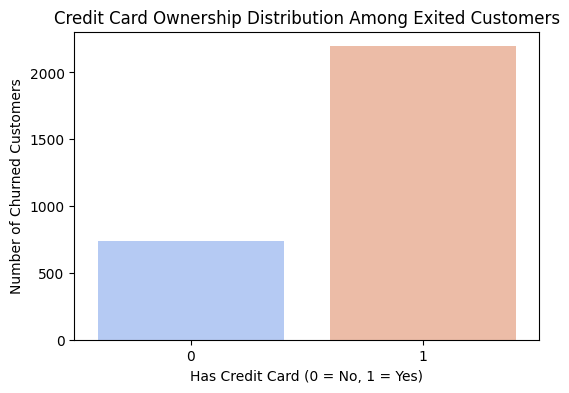

In [ ]:
#  Step 9: Credit Card Distribution Among Churned Customers
churned_customers = df[df['exited'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=churned_customers, x='hascrcard', palette="coolwarm")
plt.title("Credit Card Ownership Distribution Among Exited Customers")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Number of Churned Customers")
plt.show()

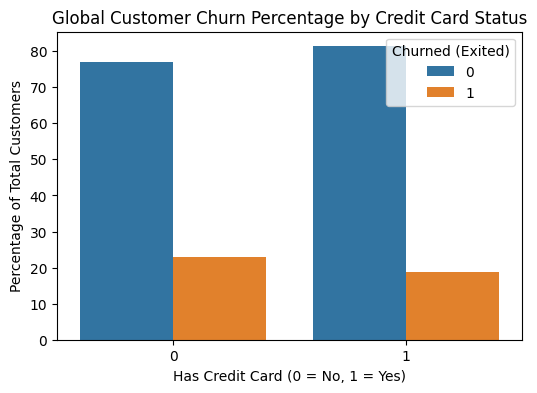

In [ ]:
# Step 10: Churn Percentage by Credit Card Ownership
churn_group = df.groupby(['hascrcard', 'exited']).size().reset_index(name='count')
total_customers = df.groupby('hascrcard')['customerid'].count().reset_index(name='total')
churn_percent = churn_group.merge(total_customers, on='hascrcard')
churn_percent['percentage'] = (churn_percent['count'] / churn_percent['total']) * 100
plt.figure(figsize=(6,4))
sns.barplot(data=churn_percent, x='hascrcard', y='percentage', hue='exited')
plt.title("Global Customer Churn Percentage by Credit Card Status")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Percentage of Total Customers")
plt.legend(title="Churned (Exited)")
plt.show()

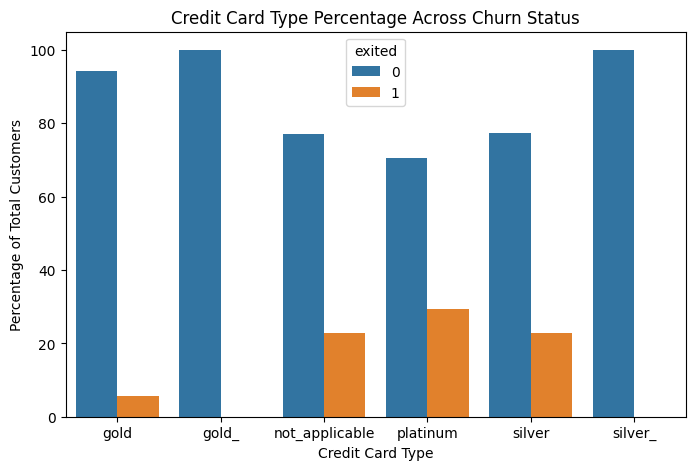

In [ ]:
#Step 11: Credit Card Type Distribution Across Churn Status
card_group = df.groupby(['card_type', 'exited']).size().reset_index(name='count')
total_card = df.groupby('card_type')['customerid'].count().reset_index(name='total')
card_group = card_group.merge(total_card, on='card_type')
card_group['percentage'] = (card_group['count'] / card_group['total']) * 100

plt.figure(figsize=(8,5))
sns.barplot(data=card_group, x='card_type', y='percentage', hue='exited')
plt.title("Credit Card Type Percentage Across Churn Status")
plt.xlabel("Credit Card Type")
plt.ylabel("Percentage of Total Customers")
plt.show()

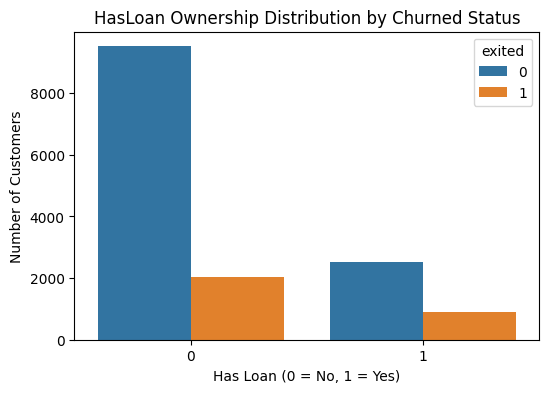

In [ ]:
# Step 12: Loan Ownership vs Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hasloan', hue='exited')
plt.title("HasLoan Ownership Distribution by Churned Status")
plt.xlabel("Has Loan (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

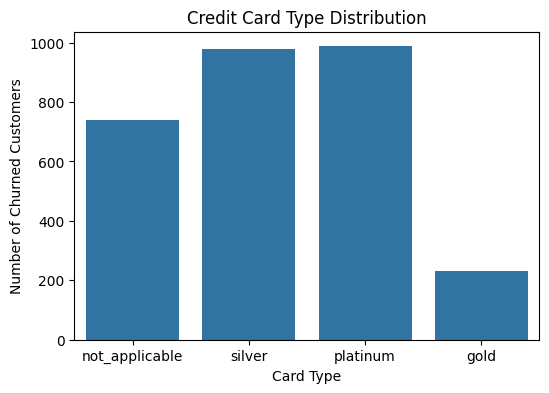

In [ ]:
# Step 13: Number of Products vs Churn (Churned customers only)
plt.figure(figsize=(6,4))
sns.countplot(data=churned_customers, x='card_type')
plt.title("Credit Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("Number of Churned Customers")
plt.show()

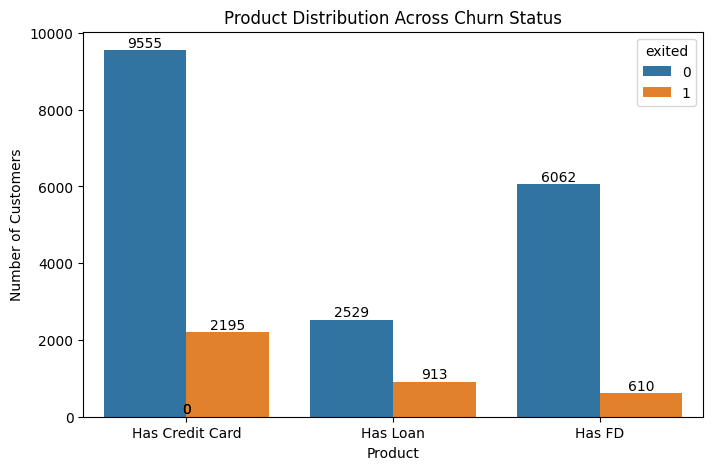

In [ ]:
# Step 14: Product Distribution Across Churn
product_counts = pd.DataFrame({
    'Has Credit Card': df.groupby('exited')['hascrcard'].sum(),
    'Has Loan': df.groupby('exited')['hasloan'].sum(),
    'Has FD': df.groupby('exited')['hasfd'].sum()
}).reset_index()

product_counts_melted = product_counts.melt(id_vars='exited', var_name='Product', value_name='Count')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=product_counts_melted, x='Product', y='Count', hue='exited')
plt.title("Product Distribution Across Churn Status")
plt.xlabel("Product")
plt.ylabel("Number of Customers")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

/tmp/ipython-input-1718805408.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



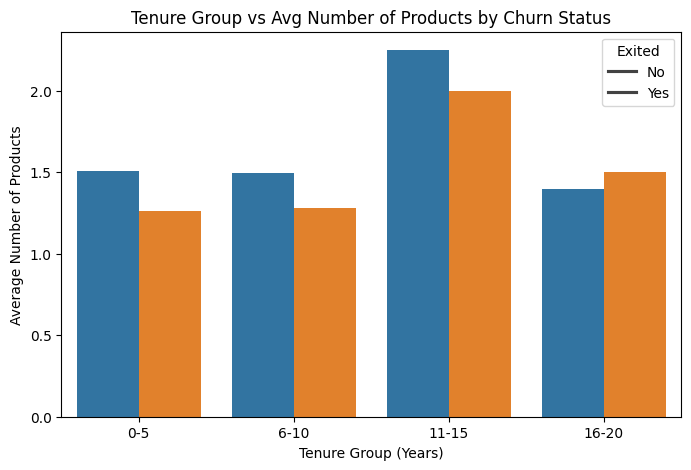

In [ ]:
# Step 15: Average Product Usage by Tenure Groups Across Churn Status
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,5,10,15,20], labels=['0-5','6-10','11-15','16-20'])
tenure_avg = df.groupby(['tenure_group', 'exited'])['numofproducts'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=tenure_avg, x='tenure_group', y='numofproducts', hue='exited')
plt.title("Tenure Group vs Avg Number of Products by Churn Status")
plt.xlabel("Tenure Group (Years)")
plt.ylabel("Average Number of Products")
plt.legend(title="Exited", labels=['No', 'Yes'])
plt.show()


/tmp/ipython-input-616761212.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



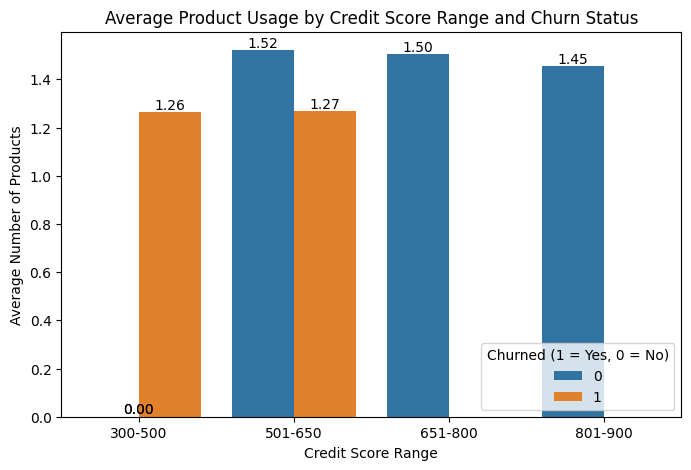

Index(['rownumber', 'customerid', 'first_name', 'state', 'gender', 'age',
       'tenure', 'creditscore', 'balance', 'hascrcard', 'card_type', 'hasloan',
       'hasfd', 'numofproducts', 'isactivemember', 'salary', 'exited',
       'complain', 'numcomplain', 'satisfaction_score', 'point_earned',
       'preferredchannel', 'debt_to_income_ratio', 'loyalty_score',
       'high_complainer', 'salary_category', 'income_group', 'age_group',
       'tenure_group', 'creditscore_range'],
      dtype='object')


In [ ]:
#Step 16: Average Number of Products by Credit Score Ranges Across Churn Status
df['creditscore_range'] = pd.cut(df['creditscore'], bins=[300,500,650,800,900],
                                 labels=['300-500','501-650','651-800','801-900'])
credit_avg = df.groupby(['creditscore_range', 'exited'])['numofproducts'].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=credit_avg, x='creditscore_range', y='numofproducts', hue='exited')
plt.title("Average Product Usage by Credit Score Range and Churn Status")
plt.xlabel("Credit Score Range")
plt.ylabel("Average Number of Products")

# Annotating
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.legend(title="Churned (1 = Yes, 0 = No)")
plt.show()

print(df.columns)

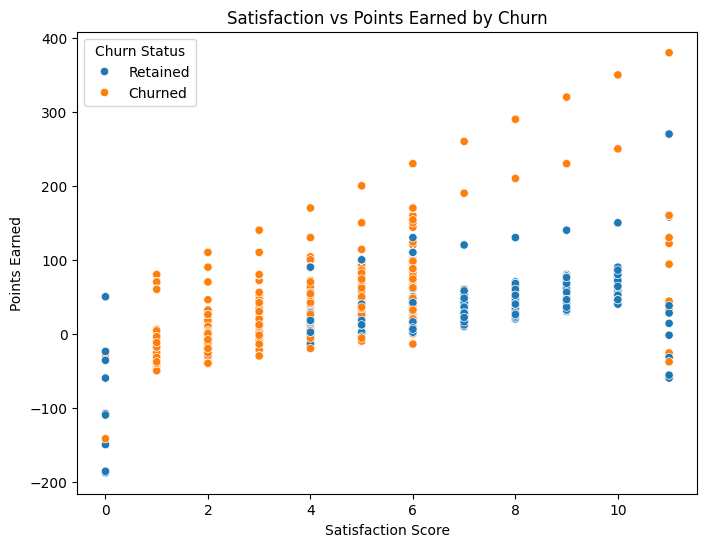

In [ ]:
# Step 17: Satisfaction vs Points Earned by Churn

df['churn_status'] = df['exited'].map({1: 'Churned', 0: 'Retained'})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='satisfaction_score',
    y='point_earned',
    hue='churn_status',

)
plt.title("Satisfaction vs Points Earned by Churn")
plt.xlabel("Satisfaction Score")
plt.ylabel("Points Earned")
plt.legend(title="Churn Status")
plt.show()

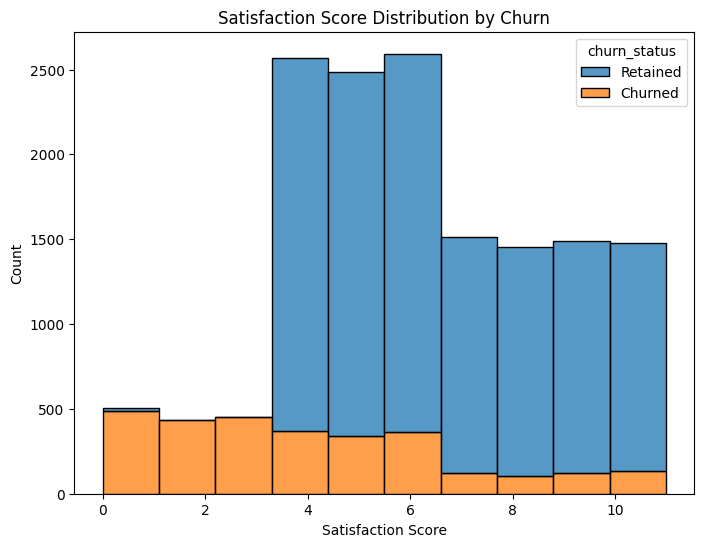

In [ ]:
# Step 18 : Satisfaction Score Distribution by Churn
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x='satisfaction_score',
    hue='churn_status',
    bins=10,
    multiple='stack'
)
plt.title("Satisfaction Score Distribution by Churn")
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.show()

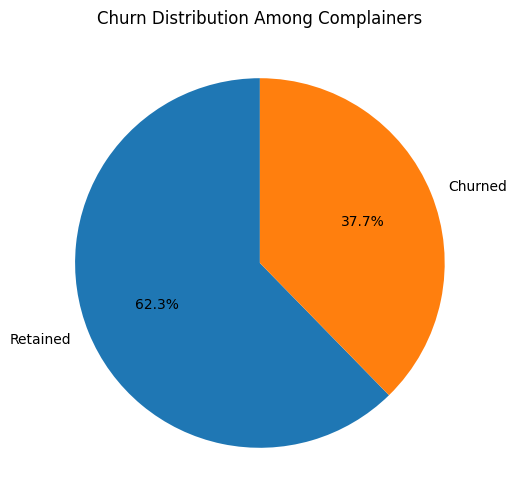

In [ ]:
# Step 19: Churn Distribution Among Complainers
complain_df = df[df['complain'] == 1]
complain_churn = complain_df['churn_status'].value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(
    complain_churn,
    labels=complain_churn.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Churn Distribution Among Complainers")
plt.show()

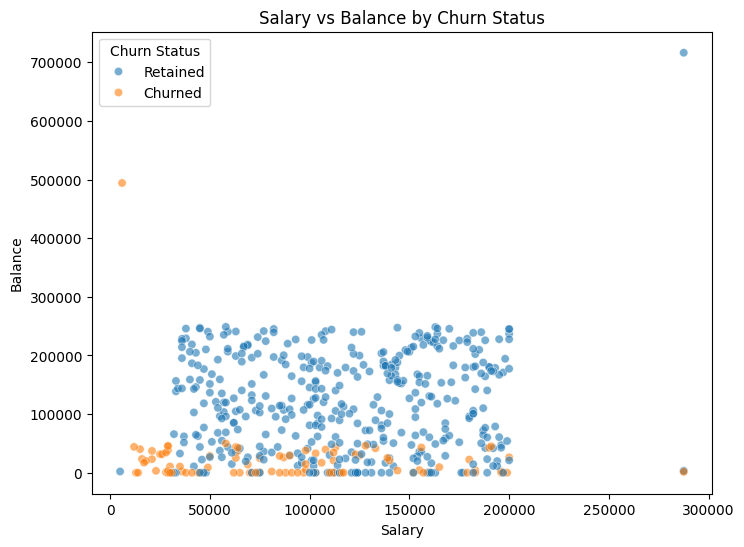

In [ ]:
# Step 20: Salary vs Balance by Churn Status (sample 500 customers)
sample_df = df.sample(n=500, random_state=42)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=sample_df,
    x='salary',
    y='balance',
    hue='churn_status',
    alpha=0.6
)
plt.title("Salary vs Balance by Churn Status")
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.legend(title="Churn Status")
plt.show()

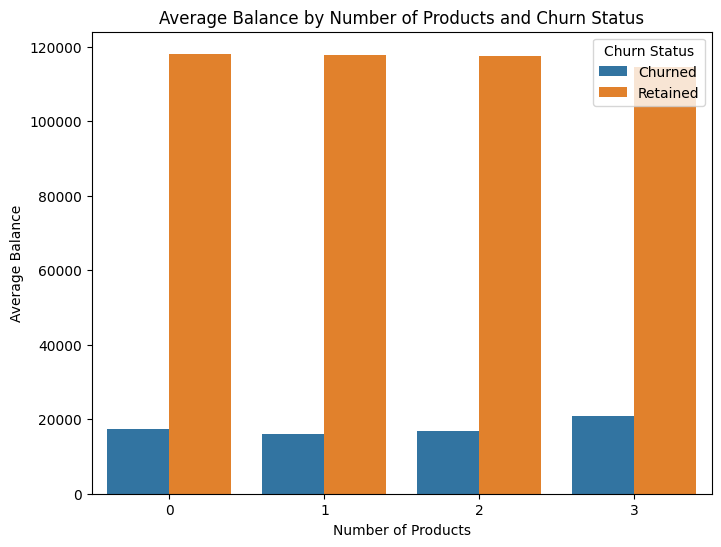

In [ ]:
# Step 21: Average Balance by Number of Products and Churn Status
avg_balance = df.groupby(['numofproducts', 'churn_status'])['balance'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(
    data=avg_balance,
    x='numofproducts',
    y='balance',
    hue='churn_status'
)
plt.title("Average Balance by Number of Products and Churn Status")
plt.xlabel("Number of Products")
plt.ylabel("Average Balance")
plt.legend(title="Churn Status")
plt.show()

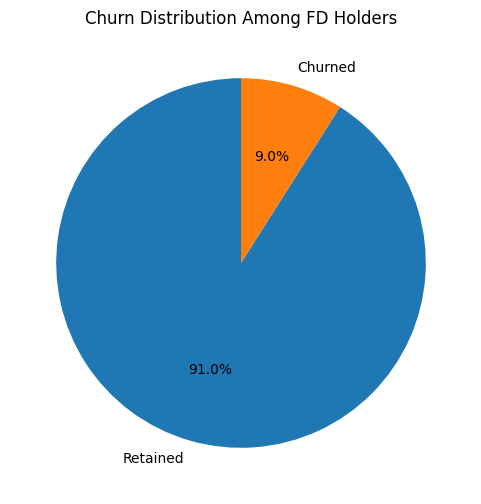

In [ ]:
# Step 22: Churn Distribution Among FD Holders
fd_df = df[df['hasfd'] == 1]
fd_churn = fd_df['churn_status'].value_counts(normalize=True).round(2)
plt.figure(figsize=(6,6))
plt.pie(
    fd_churn,
    labels=fd_churn.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Churn Distribution Among FD Holders")
plt.show()